# Workshop - 1: K- Means Clustering¶
This notebook will walk through some of the basics of K-Means Clustering.

# Author: Ankit Chatterjee

Important Libarires :

In [3]:
# Importing all the libraries needed in this notebook
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
import sklearn.metrics as sm
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import DBSCAN 
from sklearn.decomposition import PCA

In [35]:
plt.rcParams['figure.figsize']=(10,7)

# Loading the dataset

In [11]:
df_iris= sns.load_dataset('iris')
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Data-preprocessing

In [16]:
#shape of dataset 
df_iris.shape

(150, 5)

In [17]:
# check the info of data
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
# check the description of student_score data
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
# Checking for NaN values
df_iris.isnull().sum()*100/len(df_iris)

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

#here is no null value 

In [22]:
#cheking skewness of the data
df_iris.skew()

sepal_length    0.314911
sepal_width     0.318966
petal_length   -0.274884
petal_width    -0.102967
dtype: float64

In [ ]:
# separte catagorical column and numerical column

In [24]:
df_num=df_iris.select_dtypes(np.number)

In [26]:
df_o=df_iris.select_dtypes('O')

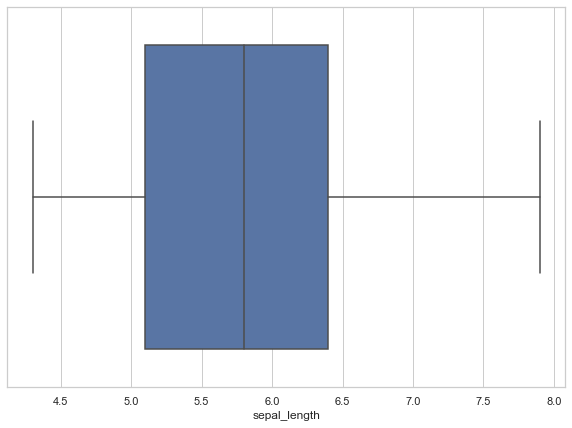

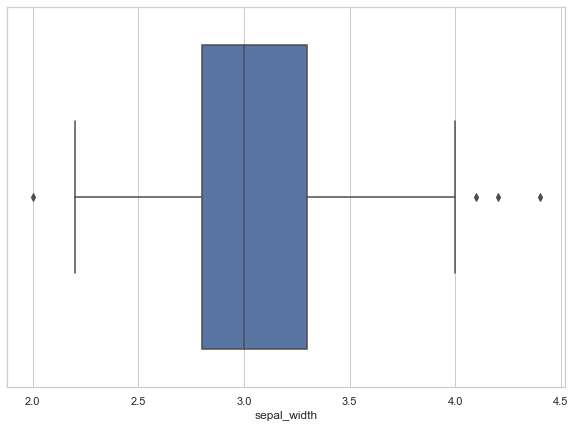

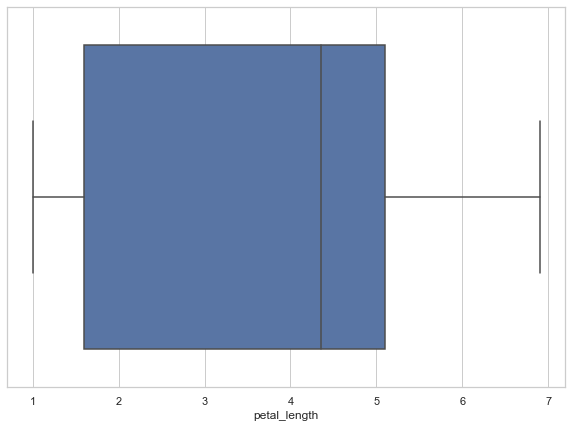

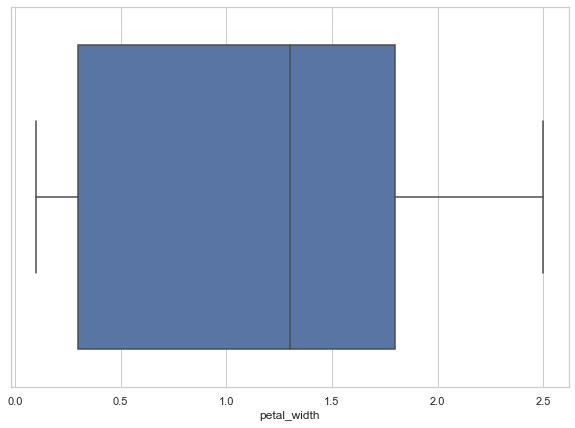

In [36]:
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.show()

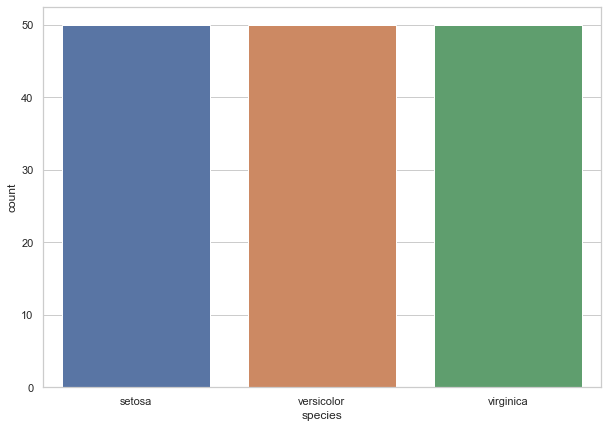

In [37]:
for i in df_o.columns:
    sns.countplot(df_o[i])
    plt.show()

# Label Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_iris['species']=le.fit_transform(df_iris['species'])
df_iris['species'].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [44]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Data Visualization

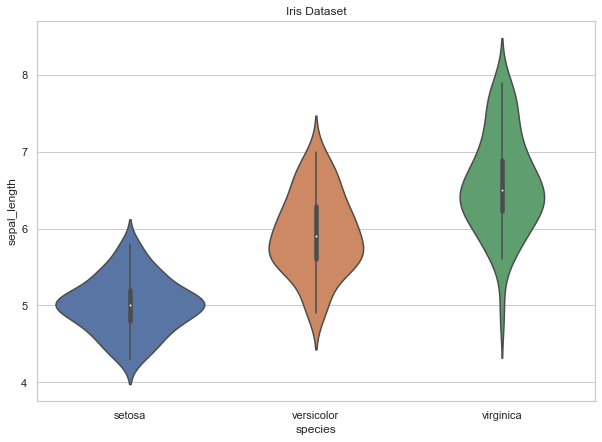

In [38]:
sns.set(style = 'whitegrid')
iris = sns.load_dataset('iris');
ax = sns.violinplot(x ='species',y = 'sepal_length',data = iris);
plt.title('Iris Dataset')
plt.show()

In [ ]:
1#above graph we clearly say that setosta lenth mostly has 4.5 to 5.5
2#above graph we clearly say that versicolor species mostly has 5.2 to 6.9
3#above graph we clearly say that virginia mostly has 6.0 to

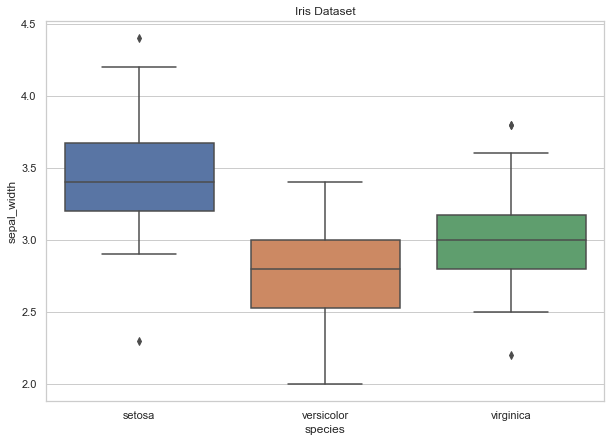

In [39]:
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.title("Iris Dataset")
plt.show()

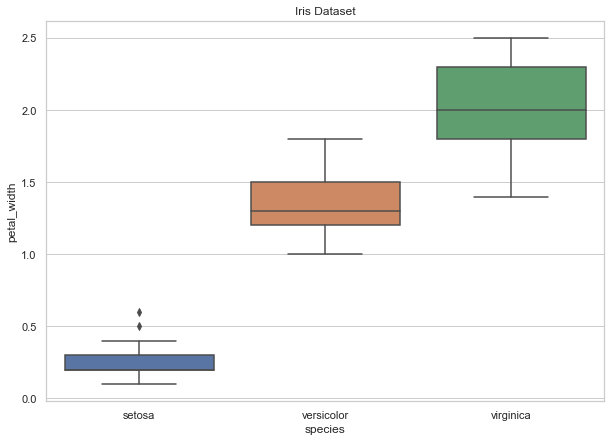

In [45]:
sns.boxplot(x='species',y='petal_width',data=iris)
plt.title("Iris Dataset")
plt.show()

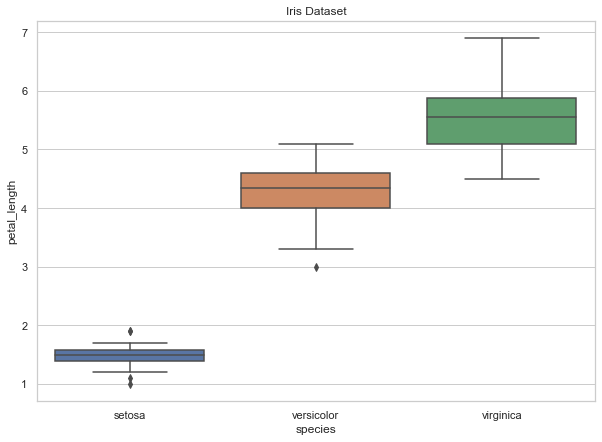

In [46]:
sns.boxplot(x='species',y='petal_length',data=iris)
plt.title("Iris Dataset")
plt.show()

<AxesSubplot:>

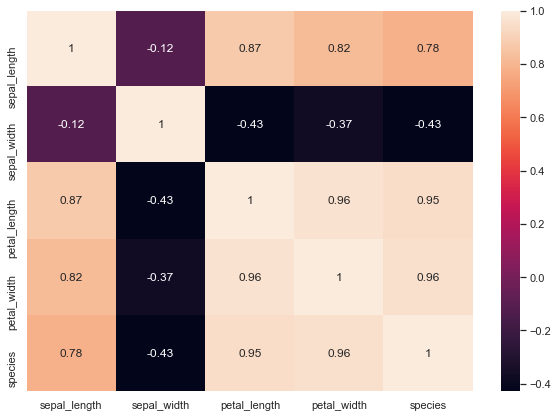

In [47]:
#finding correlation between variables of iris dataset

sns.heatmap(df_iris.corr(),annot=True)

Heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. Or we can also say that these Heat maps display numeric tabular data where the cells are colored depending upon the contained value.

Heat maps are great for making trends in this kind of data more readily apparent, particularly when the data is ordered and there is clustering.

The columns with the correlation 1 are the best correlated and vice versa.

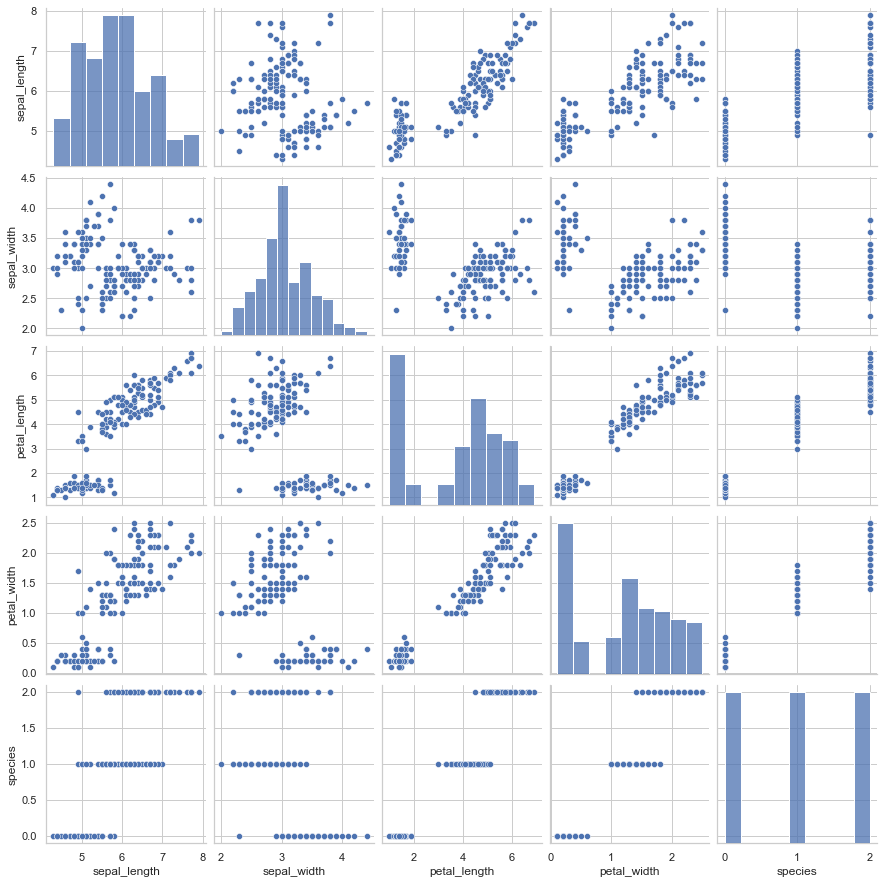

In [48]:
sns.pairplot(df_iris)

Pairplots are a really simple way to visualize relationships between each variable. It produces a matrix of relationships between each variable in the data for an instant examination of our data.

In [54]:
df=df_iris.iloc[:,[0,1,2,3]].values

# Elbow Method using within-cluster-sum-of-squares(wcss)

In [55]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
wcss

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.03998724608725,
 34.40900974025975,
 30.063110617452732,
 27.98222120518689,
 26.04670525088948]

# Using Elbow graph to find optimum no. of Clusters

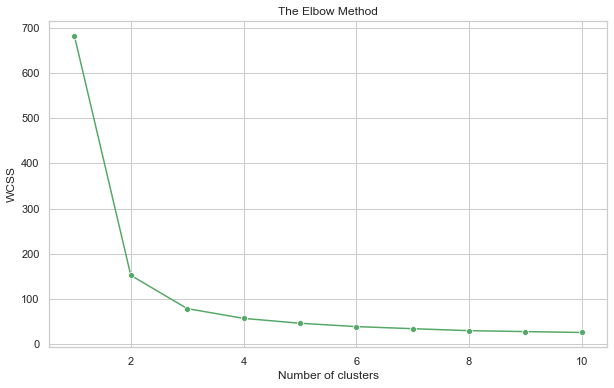

In [66]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
sns.lineplot(range(1, 11), wcss,marker='o',color='g')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


The optimum value for K would be 3. As we can see that with an increase in the number of clusters the WCSS value decreases. We select the value for K on the basis of the rate of decrease in WCSS and we can see that after 3 the drop in wcss is minimal.

# Initialization using K-means++

In [72]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 20)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# Visualizing the Model Cluster

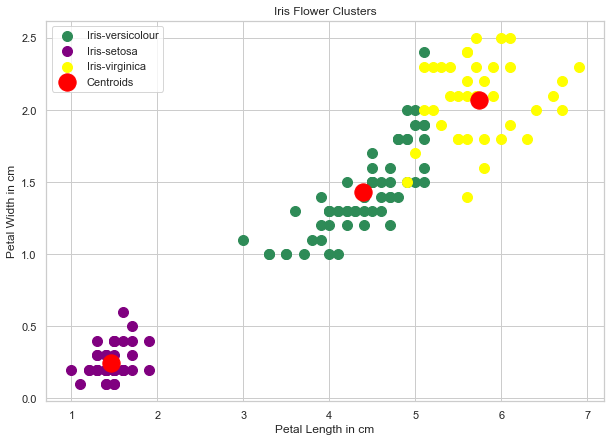

In [74]:
fig = plt.figure(figsize=(10, 7))
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(df[y_kmeans == 0, 2], df[y_kmeans == 0, 3], s = 100, c = 'seagreen', label = 'Iris-versicolour')
plt.scatter(df[y_kmeans == 1, 2], df[y_kmeans == 1, 3], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(df[y_kmeans == 2, 2], df[y_kmeans == 2, 3],s = 100, c = 'yellow', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300, c = 'red',marker='o', 
            label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()